# Project Name: Titanic dataset(Classification Problem)

The main aim of this project is to predict that how many people were surived and unsurvied . The classical problem, predict the outcome of a binary event. In laymen terms this means, it either occurred or did not occur. For example, you won or did not win, you passed the test or did not pass the test, you were accepted or not accepted, and you get the point.Here I use kaggle data competition data set from the outcome of prediction.

# Step By Step Process to Solve a Data Science Problem



# Step 1: Define the Problem
For this project, the problem statement is given to us to develop an algorithm to predict the survival outcome of passengers on the Titanic.

**Summary of the problem:**
The sinking of the RMS Titanic is occur on April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

**Reasons for loss of deaths**
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


# Step 2: Gather the Data
Data gather is main step for further data process we have many ways to gather the data 
* By webscraping from pages
* By surveys(it is difficult to collect huge data by surveys)
* By collecting data from top open sites like Kaggle,kdnuggets,UCI,Google dataset Etc.,

Here the dataset is taken from kaggle with test and train data at [Kaggle's Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)


# Step 3: Data preprocessing 

## Import the libraries
Import Necessary Libraries To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library. This will also improve the reproducibility of our project.

In [227]:
import sys    #for python version
import sklearn
import pandas
import numpy
import seaborn
import matplotlib

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scikit-learn: 0.22.1
Pandas: 1.0.1
Numpy: 1.18.1
seaborn: 0.10.0
matplotlib: 3.1.3


# Exploratory data analysis

### Import libraries for EDA

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns


# To ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

### Load the dataset

In [229]:
#import the dataset from the location
#It is the best practice to copy and preform data preprocessing on that data
df_Train=pd.read_csv('train.csv')

In [230]:
df_Train.shape

(891, 12)

In [231]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* In the dataset above,Survived is out target variable. 
* We have to predict whether the passenger survived or not.

# All about data
- <b>survival</b>--->(0 = No, 1 = Yes)	Whether person survived or not
- <b>pclass</b>---> (1 = 1st, 2 = 2nd, 3 = 3rd	1st = Upper,2nd = Middle,3rd = Lower)
- <b>sex</b>--> (male,female)	sex of the passenger
- <b>Age</b>--> Continuous varivale,Age in years
- <b>sibsp</b>--> numeric values	# siblings / spouses aboard the Titanic
- <b>Sibling</b> -->brother, sister, stepbrother, stepsister
- <b>Spouse</b> -> husband, wife
- <b>parch</b>	-->numeric values	# parents / children aboard the Titanic
- <b>Parent</b> --> mother, father
- <b>Child</b>-->daughter, son, stepdaughter, stepson, Some children travelled only with a nanny,therefore parch=0 for them
- <b>ticket</b>-->numeric values	Ticket number
- <b>fare</b>-->numeric values	Passenger fare
- <b>cabin</b>-->numeric values	Cabin number
- <b>embarked</b>-->C = Cherbourg, Q = Queenstown, S = Southampton	Port of Embarkment

In [232]:
#shape of dataset with rows and columns
print("Input data has {} rows and {} col".format(len(df_Train),len(df_Train.columns)))

Input data has 891 rows and 12 col


In [233]:
#preview of the data
print(df_Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


* From the above information we can find that we have null values present in the columns are 
  Age,Cabin,Embarked.

In [234]:
# Descriptive measures of data
df_Train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Skoog, Master. Karl Thorsten",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* <b>count</b> is the total number of non null obervations in each column.
* <b>mean</b> is the mean value of all non null observations in each column.
* <b>std</b> is the standard deviation (i.e. measure of variation).
* <b>min,25%,50%,75% and max</b> are obtained after sorting each column in ascending order.
    * <b>min:</b> the smallest value
    * <b>25%</b> the first quartile value
    * <b>50%</b> the second quartile value
    * <b>max</b> the largest value

### Missing values

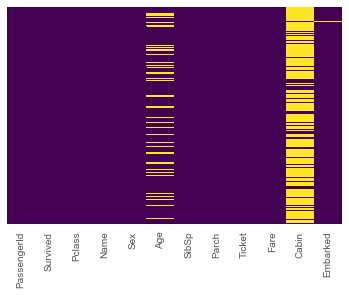

In [235]:
#check for null values in dataset
sns.heatmap(df_Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* From the above graph we have the null values are present more in Age,cabin,Survvied columns .
* lets see the percentage and we remove the variables if we want.

In [236]:
# you can determine the total number of missing values using
# the isnull method plus the sum method on the dataframe and also percentage level of missing values

variables_na=[variables for variables in df_Train.columns if df_Train[variables].isnull().sum()>1]

In [237]:
#gives percentage level of missing
for variables in variables_na:
    print(variables, np.round(df_Train[variables].isnull().sum()/df_Train[variables].isnull().count(), 3),  ' % missing values')


Age 0.199  % missing values
Cabin 0.771  % missing values
Embarked 0.002  % missing values


* from the percentage of missing values we can see,<b>Survived</b> column as 30%missing values <b>Age</b> column as roughly 20% missing values we can impute with 1 or 0's but in <b>cabin</b> we have more than 75 percentage we can drop the column

In [238]:
df_Train['Survived'].replace(np.nan, 0, inplace = True)

### skewness 

In [239]:
df_Train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

* Survived, Pclass and Age are nearly symmertical in shape.
* SibSp, Parch and Fare variables are positively skewed (asymmetircal in shape).

# Type of variables

<b>Numerical Variables</b>

The values of a numerical variable are numbers. They can be further classified into:

- Discrete variables
- Continuous variables

<b>Discrete Variable : </b>
In a discrete variable, the values are whole numbers (counts). For example, the number of items bought by a customer in a supermarket is discrete. The customer can buy 1, 25, or 50 items, but not 3.7 items. It is always a round number. 

In the data Continuous variables are : <b>sibSp</b> ,<b>parch</b> and <b>Survived</b>  are of this type

<b>Continuous Variable : </b>
A variable that may contain any value within a range is continuous. For example, the total amount paid by a customer in a supermarket is continuous. The customer can pay, GBP 20.5, GBP 13.10, GBP 83.20 and so on. 

In the data Continuous variables are : <b>Age</b> and <b>Fare</b> are of this type

### Numerical variables

In [240]:
# list of numerical variables
numerical_features = [variables for variables in df_Train.columns if df_Train[variables].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_Train[numerical_features].head()

Number of numerical variables:  7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


### Discrete Variables

In [241]:
df_Train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

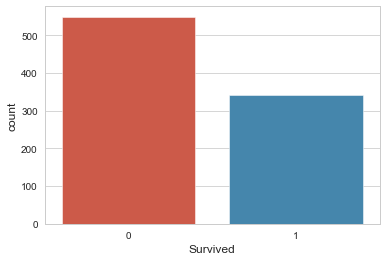

In [242]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_Train)

Out of 891 passengers in training set, only around 342 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

In [243]:
df_Train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

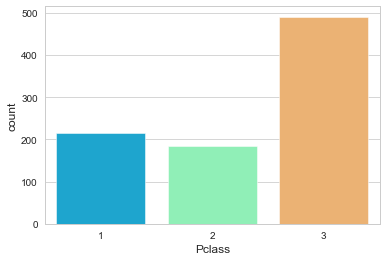

In [244]:
sns.countplot(x='Pclass',data=df_Train,palette='rainbow')

In [245]:
df_Train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

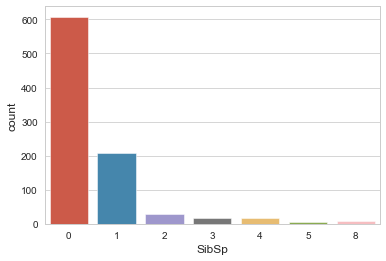

In [246]:
sns.countplot(x='SibSp',data=df_Train)

In [247]:
df_Train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

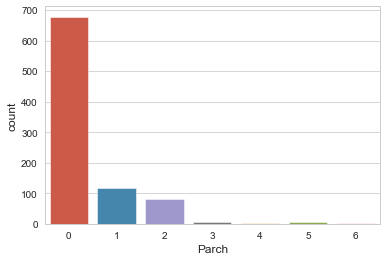

In [248]:
sns.countplot(x='Parch',data=df_Train)

### Continous variables 

In [249]:
df_Train['Age'].median()

28.0

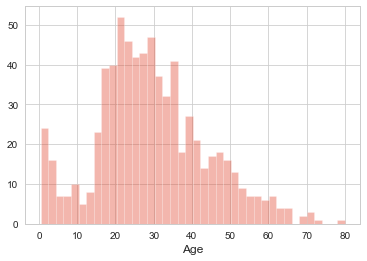

In [250]:
sns.distplot(df_Train['Age'].dropna(),kde=False,bins=40)

In [251]:
df_Train['Fare'].median()

14.4542

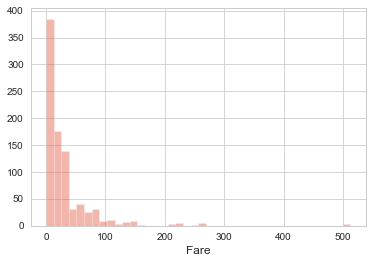

In [252]:
sns.distplot(df_Train['Fare'].dropna(),kde=False,bins=40)

# Categorical Variables

The values of a categorical variable are selected from a group of categories, also called labels. Examples are gender (male or female) and marital status (never married, married, divorced or widowed). 

Categorical variables can be further categorised into:

* Ordinal Variables
* Nominal variables

<b>Ordinal Variable</b>

Ordinal variables are categorical variable in which the categories can be meaningfully ordered. For example:

- Student's grade in an exam (A, B, C or Fail).
- Days of the week, where Monday = 1 and Sunday = 7.
- Educational level, with the categories Elementary school, High school, College graduate and PhD ranked from 1 to 4.

In the given dataset <b>Pclass</b>(as it has order in num 1 = 1st, 2 = 2nd, 3 = 3rd 1st = Upper,2nd = Middle,3rd = Lower) are of this type.


<b>Nominal Variable</b>

For nominal variables, there isn't an intrinsic order in the labels. For example, country of birth, with values Argentina, England, Germany, etc., is nominal. Other examples of nominal variables include:

- Car colour (blue, grey, silver, ...)
- Vehicle make (Citroen, Peugeot, ...)
- City (Manchester, London, Chester, ...)

In the given dataset <b>Sex</b>, <b>Embarled</b> are of this type.

<b>Mixed Variables</b>

Mixed variables are those which values contain both numbers and labels.

In the given dataset <b>Ticket</b> is of this type.

<b>Text</b>: Text in nature,

Name is text data in this data set.


In [253]:
#Categorical features
## First lets handle Categorical features which are missing
Categorical_features = [variables for variables in df_Train.columns if df_Train[variables].dtypes =='O']
print('Number of Categorical variables: ', len(Categorical_features))

# visualise the Categorical variables
df_Train[Categorical_features].head()

Number of Categorical variables:  5


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [254]:
df_Train['Sex'].unique()

array(['male', 'female'], dtype=object)

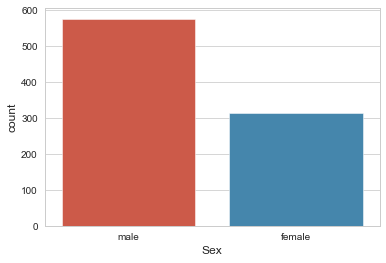

In [255]:
sns.countplot(df_Train.Sex)

In [256]:
df_Train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

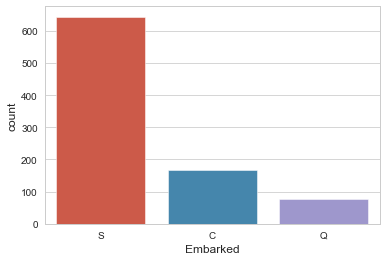

In [257]:
sns.countplot(df_Train['Embarked'].dropna())

In [258]:
df_Train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
D              3
              ..
A34            1
E46            1
B102           1
D10 D12        1
A14            1
Name: Cabin, Length: 147, dtype: int64

In [259]:
df_Train.Ticket.value_counts()

1601        7
CA. 2343    7
347082      7
3101295     6
347088      6
           ..
2650        1
13213       1
347468      1
349205      1
243880      1
Name: Ticket, Length: 681, dtype: int64

# Correlation between variables 

# Correlation

The two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

**POSITIVE CORRELATION:** If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.

**NEGATIVE CORRELATION:** If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.


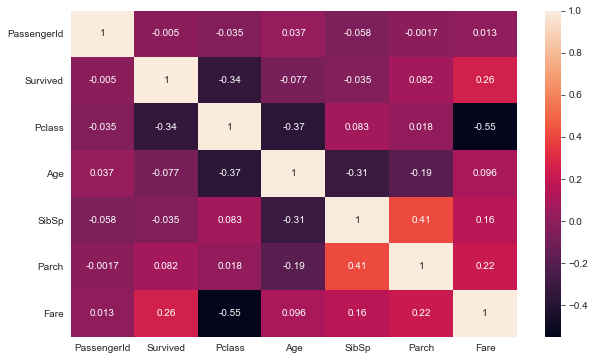

In [260]:
plt.figure(figsize=(10,6))
sns.heatmap(df_Train.corr(), annot=True)

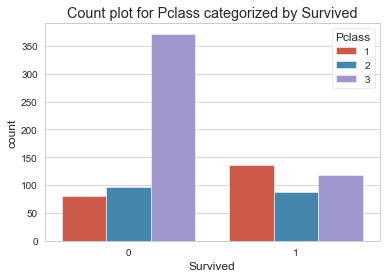

In [261]:
sns.countplot(x='Survived', hue='Pclass', data=df_Train)
plt.title('Count plot for Pclass categorized by Survived');

* From the above it is completely clear that most of the survived people are from upper class and the lower class people were not given importance to travel in lifeboats

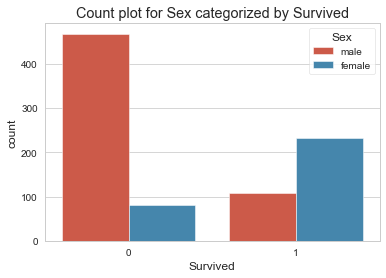

In [262]:
sns.countplot(x='Survived', hue='Sex', data=df_Train)
plt.title('Count plot for Sex categorized by Survived');

* From above plot we can obsereve that maximum male passengers had died and most of the female passengers survived. 
* Female passengers were given priority for survival.
* Gender seems to be an important feature impacting the survival of passengers.

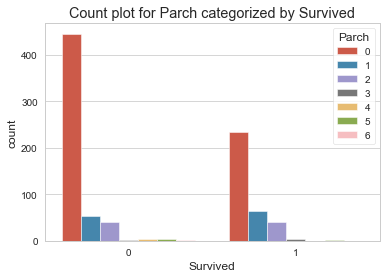

In [263]:
sns.countplot(x='Survived', hue='Parch', data=df_Train)
plt.title('Count plot for Parch categorized by Survived');

- Here parch represents parents / children aboard the Titanic.

- From the above we getting that a person whose as more three person(relateds as parents/children) are survived, there may    may be chance of single person survived whose is alone 

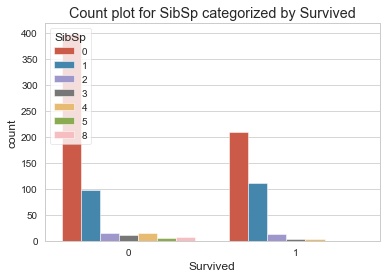

In [264]:
sns.countplot(x='Survived', hue='SibSp', data=df_Train)
plt.title('Count plot for SibSp categorized by Survived');


- from the above graph as SibSp represents siblings,cousins, wife etc, so that the person who are more in number>3 are survived 
- From the variables SibSp and Parch we can create a new Variable that is Family_size and also we can get how many are alone

- Creating the new variable for the better understanding of family and the person who are alone in the ship


# Finding the Outliers

## What is an Outlier?
Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

Criteria to identify an outlier

- Boxplot
- scatterplot

Following approach to handle outliers

- Trimming(remove outliers)
- Treat outliers as missing data and we need to impute with techniques
- Discrestisation
- binning the variables to max or min

This plot show us value of min, max, median and quartile ranges. 


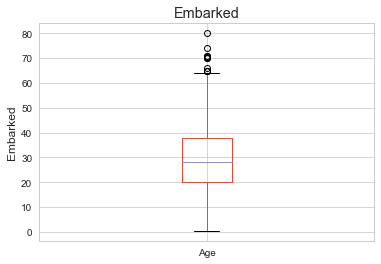

In [265]:
df_Train.boxplot(column='Age')
plt.ylabel(variables)
plt.title(variables)
plt.show()

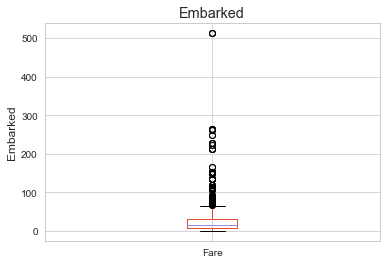

In [266]:
df_Train.boxplot(column='Fare')
plt.ylabel(variables)
plt.title(variables)
plt.show()
        

- From the boxplots we came to we have much outliers in Age and Fare columns so we perform and remove the outliers in feature engineering 

# Step 4: Feature Engineering

## Handling missing values

**Missing Values** occur when no data/value is stored for certain observations with in a variable it may cause impact on output of the data

**Why data is missing ?**

The source of missing data can be very different
- A value is missing because it was forgetten or not stored properly
- For a certain observations the value does not exist
- The value can't be known or identified

**Techniques of handling missing values**
- Mean/median for continuous ,mode for category
- capturing Nan values with a new feature
- Random sample Imputation
- Frequency category imputation etc.,

- Here we have seen <b>Age</b> has outliers so we use median to impute the missing values so it may not effect the output values.
- As Embarked is categorical we mode for imputation of missing values.

In [267]:
df_Train['Age'].fillna(df_Train['Age'].median(),inplace = True)

In [268]:
df_Train['Embarked'].fillna(df_Train['Embarked'].mode()[0], inplace = True)

### Creating new variables

In [269]:
#Creating the new variables
for variables in numerical_features:
     #FamilySize of the people combining the Sibsp and parch
    df_Train['FamilySize'] = df_Train['SibSp'] + df_Train['Parch'] + 1
    #Alone variable(single person boarded into the ship)
    df_Train['IsAlone'] = 1 #initialize to yes/1 is alone
    df_Train['IsAlone'].loc[df_Train['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1


In [270]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


- Now coming to <b>Name</b> column we have no impact with names and we can see we have saluations to the names like Mr , Mrs, Miss so we can split in that way to convert in to numerical manner by using regular expression

In [271]:
df_Train['Name'] = df_Train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [272]:
df_Train['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [273]:
df_Train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Mme           1
Don           1
Lady          1
Sir           1
Jonkheer      1
Ms            1
Capt          1
Name: Name, dtype: int64

In [274]:
df_Train=df_Train.replace(['Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'],'people')

In [275]:
df_Train['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'people'], dtype=object)

- Now we can easily assign a values to each words by key values method and convert to numeric variables

In [276]:
df1={'Mr':1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Don': 5, 'people':6}
df_Train['Name']=df_Train['Name'].map(df1)

In [277]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,1,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,2,female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,2,female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,1,male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [278]:
df_Train.Cabin.fillna('Missing', inplace=True)

In [279]:
df_Train['Cabin'] = df_Train['Cabin'].astype(str).str[0]
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,1,male,22.0,1,0,A/5 21171,7.2500,M,S,2,0
1,2,1,1,2,female,38.0,1,0,PC 17599,71.2833,C,C,2,0
2,3,1,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,1
3,4,1,1,2,female,35.0,1,0,113803,53.1000,C,S,2,0
4,5,0,3,1,male,35.0,0,0,373450,8.0500,M,S,1,1


In [280]:
df_Train['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [281]:
df_Train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [282]:
df2={'A':1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F':6,'G':7,'M':8,'T':9}
df_Train['Cabin']=df_Train['Cabin'].map(df2)

In [283]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,1,male,22.0,1,0,A/5 21171,7.2500,8,S,2,0
1,2,1,1,2,female,38.0,1,0,PC 17599,71.2833,3,C,2,0
2,3,1,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,8,S,1,1
3,4,1,1,2,female,35.0,1,0,113803,53.1000,3,S,2,0
4,5,0,3,1,male,35.0,0,0,373450,8.0500,8,S,1,1


#### Problem With Age Feature:
As **Age is a continous feature**, there is a problem with Continous Variables in Machine Learning Models.

**Eg:**If I say to group or arrange students by **Sex**, We can easily segregate them by Male and Female.

Now if I say to group them by their **Age**, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these **continous values into categorical values** by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.


Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16.
So bins of size 16.

In [284]:
df_Train['Age_group']=0
#less than 16 age are group as 0
df_Train.loc[df_Train['Age']<=15,'Age_group']=0
#Greater than 16 and less than or equalto 32 are grouped as 1
df_Train.loc[(df_Train['Age']>15)&(df_Train['Age']<=20),'Age_group']=1
#Greater than 32 and less than or equalto 48 are grouped as 2
df_Train.loc[(df_Train['Age']>20)&(df_Train['Age']<=26),'Age_group']=2
#Greater than 48 and less than or equalto 64 are grouped as 3
df_Train.loc[(df_Train['Age']>26)&(df_Train['Age']<=32),'Age_group']=3
#Greater than 64 are grouped as 4
df_Train.loc[(df_Train['Age']>32)&(df_Train['Age']<=38),'Age_group']=4
df_Train.loc[(df_Train['Age']>38)&(df_Train['Age']<=45),'Age_group']=5
df_Train.loc[df_Train['Age']>45,'Age_group']=6



In [285]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_group
0,1,0,3,1,male,22.0,1,0,A/5 21171,7.2500,8,S,2,0,2
1,2,1,1,2,female,38.0,1,0,PC 17599,71.2833,3,C,2,0,4
2,3,1,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,8,S,1,1,2
3,4,1,1,2,female,35.0,1,0,113803,53.1000,3,S,2,0,4
4,5,0,3,1,male,35.0,0,0,373450,8.0500,8,S,1,1,4


In [286]:
#checking the number of passenegers in each band
df_Train['Age_group'].value_counts().to_frame()

,Age_group
3,304
2,140
6,103
1,96
4,91
0,83
5,74


As <b>Fare</b> is also contiuous variable we need to perform same as we performed to <b>Age</b> variable as done above

In [287]:
df_Train['Fare_Range']=pd.qcut(df_Train['Fare'],4)

In [288]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_group,Fare_Range
0,1,0,3,1,male,22.0,1,0,A/5 21171,7.2500,8,S,2,0,2,"(-0.001, 7.91]"
1,2,1,1,2,female,38.0,1,0,PC 17599,71.2833,3,C,2,0,4,"(31.0, 512.329]"
2,3,1,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,8,S,1,1,2,"(7.91, 14.454]"
3,4,1,1,2,female,35.0,1,0,113803,53.1000,3,S,2,0,4,"(31.0, 512.329]"
4,5,0,3,1,male,35.0,0,0,373450,8.0500,8,S,1,1,4,"(7.91, 14.454]"


In [289]:
df_Train['Fare_Range']=0
df_Train.loc[df_Train['Fare']<=7.91,'Fare_Range']=0
df_Train.loc[(df_Train['Fare']>7.91)&(df_Train['Fare']<=14.454),'Fare_Range']=1
df_Train.loc[(df_Train['Fare']>14.454)&(df_Train['Fare']<=31),'Fare_Range']=2
df_Train.loc[(df_Train['Fare']>31)&(df_Train['Fare']<=513),'Fare_Range']=3

In [290]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_group,Fare_Range
0,1,0,3,1,male,22.0,1,0,A/5 21171,7.2500,8,S,2,0,2,0
1,2,1,1,2,female,38.0,1,0,PC 17599,71.2833,3,C,2,0,4,3
2,3,1,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,8,S,1,1,2,1
3,4,1,1,2,female,35.0,1,0,113803,53.1000,3,S,2,0,4,3
4,5,0,3,1,male,35.0,0,0,373450,8.0500,8,S,1,1,4,1


In [291]:
df_Train['Fare_Range'].value_counts().to_frame()

,Fare_Range
2,229
0,223
3,222
1,217


## Converting categorical variable into numeric

In [292]:
Categorical_features = [variables for variables in df_Train.columns if df_Train[variables].dtypes =='O']
print('Number of Categorical variables: ', len(Categorical_features))

# visualise the Categorical variables
Categorical_features=df_Train[Categorical_features].drop(['Ticket'],axis=1)

Number of Categorical variables:  3


In [293]:
Categorical_features

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [294]:
from sklearn.preprocessing import LabelEncoder
for variables in Categorical_features:
    le=LabelEncoder()
    df_Train[variables]=le.fit_transform(df_Train[variables].astype(str))

In [295]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_group,Fare_Range
0,1,0,3,1,1,22.0,1,0,A/5 21171,7.2500,8,2,2,0,2,0
1,2,1,1,2,0,38.0,1,0,PC 17599,71.2833,3,0,2,0,4,3
2,3,1,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,8,2,1,1,2,1
3,4,1,1,2,0,35.0,1,0,113803,53.1000,3,2,2,0,4,3
4,5,0,3,1,1,35.0,0,0,373450,8.0500,8,2,1,1,4,1


## Droping the un necessary feature from the data set



<b>Age</b>--> We have the Age_group feature, so no need of this.

<b>Ticket</b>--> It is  random string that cannot be categorised.

<b>Fare</b>--> We have the Fare_Range feature, so no need of this 



In [296]:
df_Train.drop(['Age','Ticket','Fare'],axis=1,inplace=True)

In [297]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,FamilySize,IsAlone,Age_group,Fare_Range
0,1,0,3,1,1,1,0,8,2,2,0,2,0
1,2,1,1,2,0,1,0,3,0,2,0,4,3
2,3,1,3,3,0,0,0,8,2,1,1,2,1
3,4,1,1,2,0,1,0,3,2,2,0,4,3
4,5,0,3,1,1,0,0,8,2,1,1,4,1


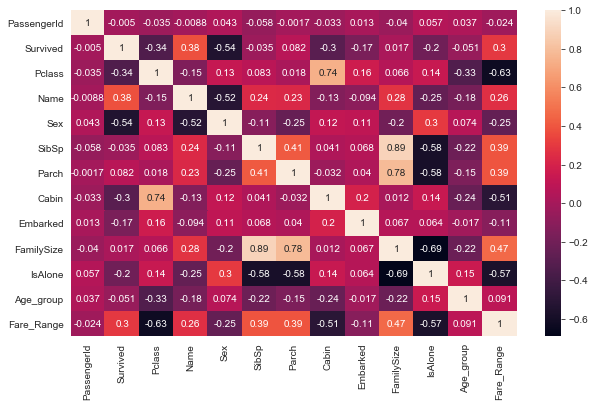

In [298]:
plt.figure(figsize=(10,6))
sns.heatmap(df_Train.corr(), annot=True)

## Feature Selection

In [299]:
df_Test=pd.read_csv('df_test.csv')

In [300]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,FamilySize,IsAlone,Age_group,Fare_Range
0,1,0,3,1,1,1,0,8,2,2,0,2,0
1,2,1,1,2,0,1,0,3,0,2,0,4,3
2,3,1,3,3,0,0,0,8,2,1,1,2,1
3,4,1,1,2,0,1,0,3,2,2,0,4,3
4,5,0,3,1,1,0,0,8,2,1,1,4,1


In [301]:
df_Test=df_Test.drop(['Parch'],axis=1)

In [302]:
df_Test.shape

(418, 11)

In [303]:
df_Train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Cabin', 'Embarked', 'FamilySize', 'IsAlone', 'Age_group',
       'Fare_Range'],
      dtype='object')

In [304]:
X=df_Train.drop(['Survived'],axis=1)
y=df_Train.Survived

In [305]:
X.values

array([[  1,   3,   1, ...,   0,   2,   0],
       [  2,   1,   2, ...,   0,   4,   3],
       [  3,   3,   3, ...,   1,   2,   1],
       ...,
       [889,   3,   3, ...,   0,   3,   2],
       [890,   1,   1, ...,   1,   2,   2],
       [891,   3,   1, ...,   1,   3,   0]], dtype=int64)

In [306]:
y.values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [307]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [308]:
print(selection.feature_importances_)

[0.2386937  0.09468687 0.11633951 0.22715688 0.03224183 0.01560133
 0.05508623 0.0375792  0.04082048 0.01162968 0.08400578 0.0461585 ]


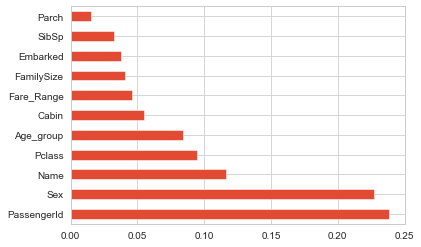

In [309]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(11,keep='first').plot(kind='barh')
plt.show()

In [310]:
X=X.drop(['Parch'],axis=1)

In [311]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [312]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [313]:
model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [314]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [315]:
selected_features=X.columns[(model.get_support())]

In [316]:
selected_features

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Cabin', 'Embarked',
       'FamilySize', 'IsAlone', 'Age_group', 'Fare_Range'],
      dtype='object')

# Step 5. Predictive Modeling

From the above data preprocessing we have gain some insights and also done many changes to the features , also created new features based on related features so now we need to perform predictions based on the features we have in the data for this we use some machine learing algorthims to pedict the output.

In [317]:
#assigning a features to one  variable and output to other variable
#Spliting the data into train and test for prediction
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [318]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
import xgboost as xgb
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #for confusion matrix

## 1. LogisticRegression

In [319]:
#we need to fit and predict the model
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


In [320]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))



** confusion_matrix **
[[139  29]
 [ 26  74]]
** Accuracy_Score **
0.79


## Logistic Regression with cross validation

In [321]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv = 10,scoring='accuracy').mean() * 100

79.46816479400749

## 2. Support vector classifier

In [322]:
#create a model and predict 
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)


In [323]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))



** confusion_matrix **
[[168   0]
 [100   0]]
** Accuracy_Score **
0.63


## Support vector classifier with cross validation

In [324]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, y, cv = 10,scoring='accuracy').mean() * 100

61.6167290886392

## 3.KNeighborsClassifier 

In [325]:
#create a model and predict
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [326]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, knn_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,knn_pred),2))

** confusion_matrix **
[[122  46]
 [ 78  22]]
** Accuracy_Score **
0.54


## KNeighborsClassifier with cross validation

In [327]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X, y, cv = 10,scoring='accuracy').mean() * 100

44.223470661672906

## 4.GaussianNB Classifier

In [328]:
#create a model and predict
NB = GaussianNB()
NB.fit(X_train,y_train)
NB_pred = NB.predict(X_test)

In [329]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, NB_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,NB_pred),2))

** confusion_matrix **
[[123  45]
 [ 16  84]]
** Accuracy_Score **
0.77


## GaussianNB Classifier with cross validation

In [330]:
from sklearn.model_selection import cross_val_score
cross_val_score(NB, X, y, cv = 10,scoring='accuracy').mean() * 100

77.89138576779025

## 5.DecisionTreeClassifier

In [331]:
#create a model and predict
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [332]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, dt_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,dt_pred),2))

** confusion_matrix **
[[128  40]
 [ 33  67]]
** Accuracy_Score **
0.73


## DecisionTreeClassifier with cross validation

In [333]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt, X, y, cv = 10,scoring='accuracy').mean() * 100

73.39950062421974

## 6.XGBClassifier

In [334]:
#create a model and predict
Xgb = xgb.XGBClassifier()
Xgb.fit(X_train,y_train)
Xgb_pred = Xgb.predict(X_test)

In [335]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, Xgb_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print((accuracy_score(y_test,Xgb_pred)))


** confusion_matrix **
[[148  20]
 [ 27  73]]
** Accuracy_Score **
0.8246268656716418


In [336]:
print(classification_report(y_test, Xgb_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.73      0.76       100

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



## XGBClassifier with cross validation

In [337]:
from sklearn.model_selection import cross_val_score
cross_val_score(Xgb, X, y, cv = 10,scoring='accuracy').mean() * 100

80.0187265917603

## 7.RandomForestClassifier

In [338]:
#create a model and predict
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)
Rf_pred = Rf.predict(X_test)

In [339]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, Rf_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,Rf_pred),2))

** confusion_matrix **
[[140  28]
 [ 28  72]]
** Accuracy_Score **
0.79


## RandomForestClassifier with cross validation

In [340]:
from sklearn.model_selection import cross_val_score
cross_val_score(Rf, X, y, cv = 10,scoring='accuracy').mean() * 100

81.25842696629212

## Hyperparameter tuning 

In [341]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
Rf = RandomForestClassifier()

In [342]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [10, 50, 100, 300],
    'max_features': ['auto', 'log2'],
    'max_depth' : [2, 4, 6, 8, 10, None]    
}

In [343]:
randomForest_CV = GridSearchCV(estimator = Rf, param_grid = param_grid, cv = 10,verbose=1,n_jobs=-1)
randomForest_CV.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [344]:
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 300}

In [345]:
randomF = RandomForestClassifier(random_state = 0, criterion = 'gini', max_depth = 5, max_features = 'log2', n_estimators = 500)

randomF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [346]:
predictions = randomF.predict(X_test)

In [347]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions) * 100

81.71641791044776

In [348]:
#XGB classifier
from sklearn.model_selection import GridSearchCV
Xgb = xgb.XGBClassifier()
Xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [349]:
parameter = {'learning_rate' : [0.05, 0.075, 0.1, 0.2, 0.3, 0.4],
            'gamma' : [0, 0.05, 0.1],
            'max_depth' : [2, 3, 4, 5, 6],
            'n_estimators' : [50,75,100,125,150],
            'min_child_weight' : [1, 2, 3, 4, 5]}

In [350]:
grid = GridSearchCV(estimator= Xgb, param_grid= parameter, verbose = 1,n_jobs=-1,cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 2250 candidates, totalling 11250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4876 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 6376 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 8076 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 9976 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 11250 out of 11250 | elapsed:  6.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0, 0.05, 0.1],
                         'learning_rate': [0.05, 0.075, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [2, 3, 4, 5, 6

In [351]:
grid.best_params_

{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 50}

In [352]:
grid.best_score_

0.8218451612903225

# Submission

In [353]:
df_Test['Survived'] = grid.predict(df_Test)

In [354]:
df_Test[['PassengerId', 'Survived']].to_csv('MySubmission.csv', index = False)

In [355]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Name         418 non-null    int64
 3   Sex          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Cabin        418 non-null    int64
 6   Embarked     418 non-null    int64
 7   FamilySize   418 non-null    int64
 8   IsAlone      418 non-null    int64
 9   Age_group    418 non-null    int64
 10  Fare_Range   418 non-null    int64
 11  Survived     418 non-null    int64
dtypes: int64(12)
memory usage: 39.3 KB
